In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools

In [206]:
models = ["vit", "convnext", "xception"]
versions = ["1.4", "2.0", "2.1"]

d = {}
for model, version in itertools.product(models, versions):
    file = f"{model}_{version}_robustness.json"
    with open(file) as f:
        data = json.load(f)
        d[model + "_" + version] = data

<AxesSubplot:>

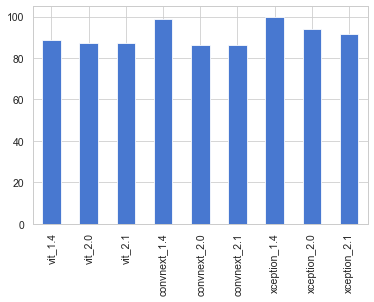

In [207]:
df = pd.DataFrame(d)

df.loc["1.4_acc"].plot.bar()

Text(0.5, 1.0, '2.1')

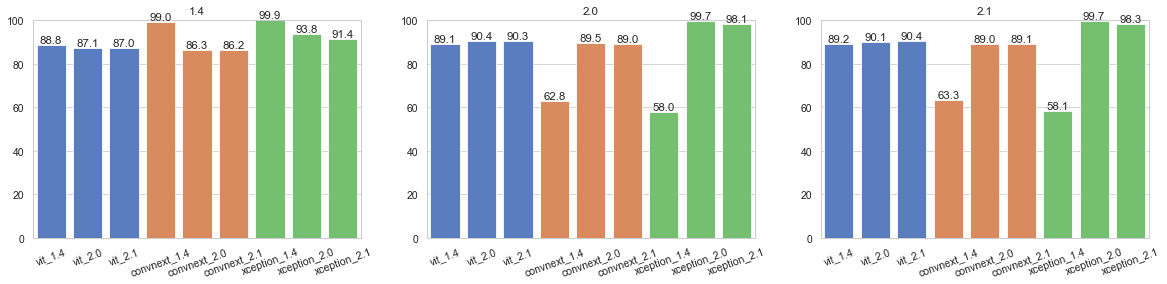

In [209]:
sns.set_theme(style="whitegrid", context="paper", palette="muted", font_scale=1.2)
fig, axes = plt.subplots(ncols=3, figsize=(20, 4))

df14 = pd.DataFrame(df.loc["1.4_acc"])
df14["hue"] = df14.index.str.split("_").str[0]
g = sns.barplot(x=df14.index, y=df14["1.4_acc"].values, hue=df14["hue"].values, ax=axes[0], dodge=False)
g.set_ylim(0, 100)
g.legend_.remove()
g.set_xticklabels(g.get_xticklabels(), rotation=20)

for i in g.containers:
    g.bar_label(i,label_type='edge', fmt='%.1f')

df20 = pd.DataFrame(df.loc["2.0_acc"])
df20["hue"] = df20.index.str.split("_").str[0]
df20["2.0_acc"].values
g = sns.barplot(x=df20.index, y=df20["2.0_acc"].values, hue=df20["hue"].values, ax=axes[1], dodge=False)
g.set_ylim(0, 100)
g.legend_.remove()
g.set_xticklabels(g.get_xticklabels(), rotation=20)

for i in g.containers:
    g.bar_label(i,label_type='edge', fmt='%.1f')

df21 = pd.DataFrame(df.loc["2.1_acc"])
df21["hue"] = df21.index.str.split("_").str[0]
g = sns.barplot(x=df21.index, y=df21["2.1_acc"].values, hue=df21["hue"].values, ax=axes[2], dodge=False)
g.set_ylim(0, 100)
g.legend_.remove()
g.set_xticklabels(g.get_xticklabels(), rotation=20)
for i in g.containers:
    g.bar_label(i,label_type='edge', fmt='%.1f')
# df.loc["1.4_acc"].plot.bar(ax=axes[0], color=["red", "red", "red", "blue", "blue", "blue", "green", "green", "green"])
# df.loc["2.0_acc"].plot.bar(ax=axes[1], color=["red", "red", "red", "blue", "blue", "blue", "green", "green", "green"])
# df.loc["2.1_acc"].plot.bar(ax=axes[2], color=["red", "red", "red", "blue", "blue", "blue", "green", "green", "green"])
axes[0].set_title("1.4")
axes[1].set_title("2.0")
axes[2].set_title("2.1")




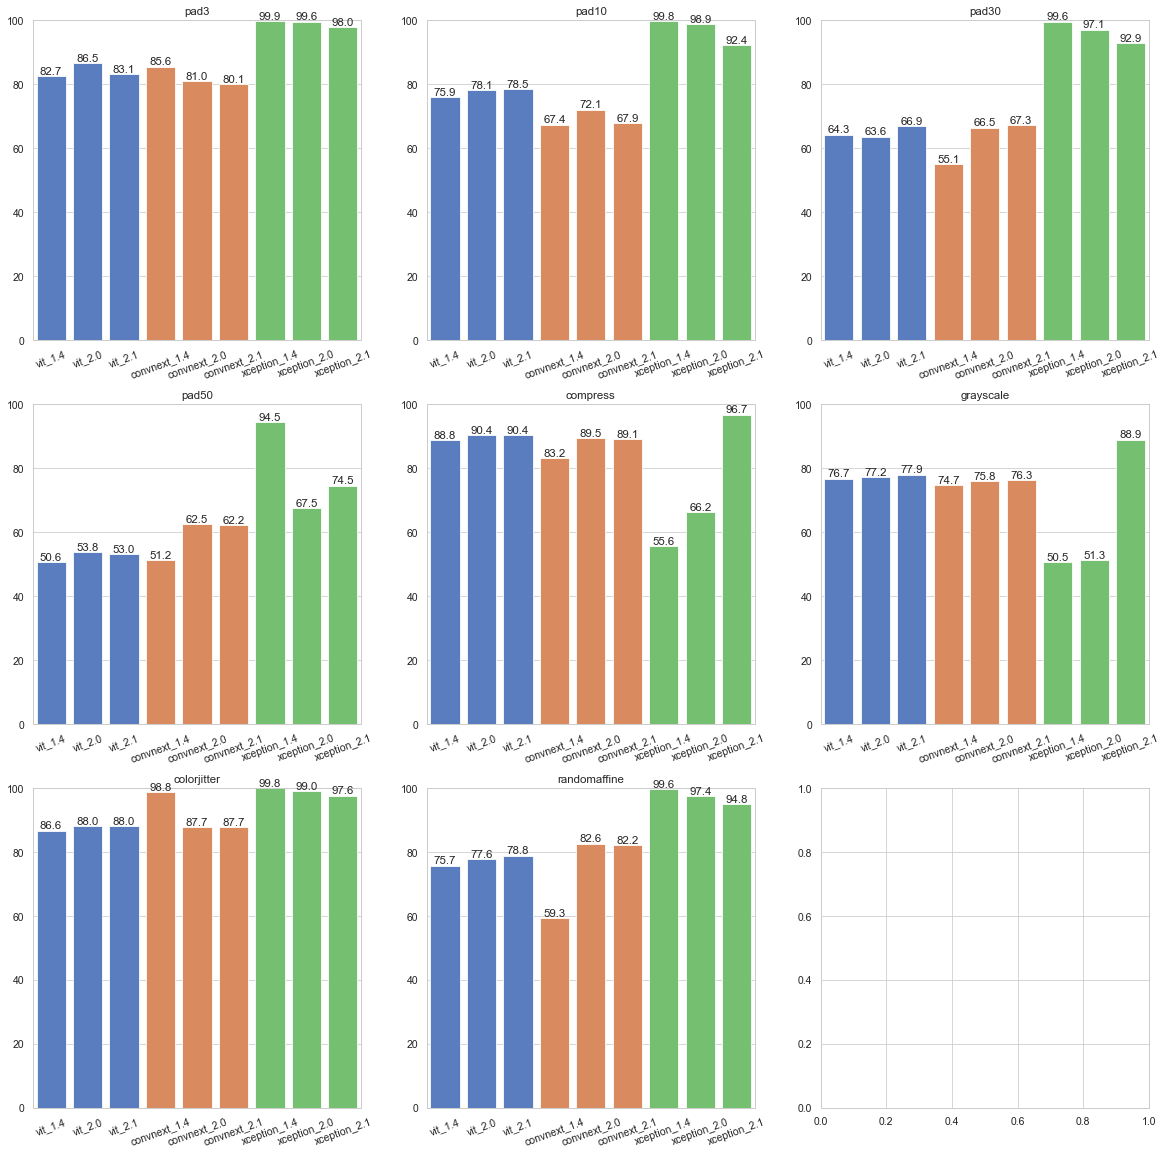

In [210]:
transforms = ["pad3", "pad10", "pad30", "pad50", "compress", "grayscale", "colorjitter", "randomaffine"]
# plot all transforms
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
for i, transform in enumerate(transforms):
    ax = axes[i // 3, i % 3]
    dftransform = pd.DataFrame(df.loc[f"{transform}_acc"])
    dftransform["hue"] = dftransform.index.str.split("_").str[0]

    g = sns.barplot(x=dftransform.index, y=dftransform[f"{transform}_acc"].values, hue=dftransform["hue"].values, ax=ax, dodge=False)
    g.set_xticklabels(g.get_xticklabels(), rotation=20)
    g.set_ylim(0, 100)
    g.legend_.remove()
    # df.loc[f"{transform}_acc"].plot.bar(ax=ax, color=["red", "red", "red", "blue", "blue", "blue", "green", "green", "green"])
    ax.set_title(transform)
    for i in g.containers:
        g.bar_label(i,label_type='edge', fmt='%.1f')


In [170]:
df14 = pd.DataFrame(df.loc["2.1_acc"])
df14["hue"] = df14.index.str.split("_").str[0]
df14["2.1_acc"].values

array([89.15, 90.1, 0, 63.285, 0, 0, 58.065, 99.655, 98.31], dtype=object)

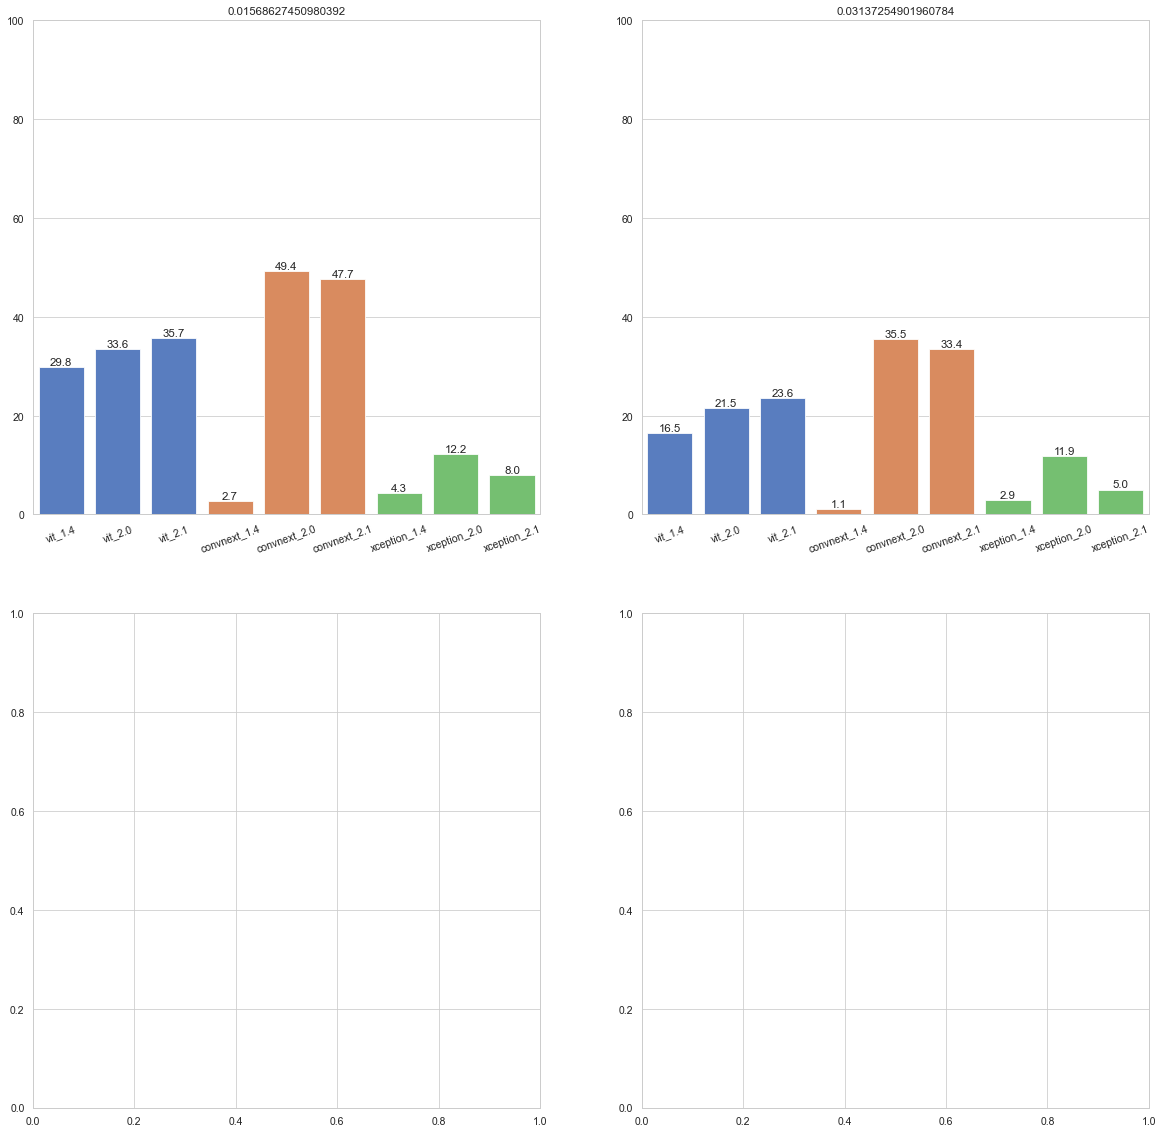

In [211]:
epsilons = ["0.01568627450980392", "0.03137254901960784"]
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
for i, eps in enumerate(epsilons):
    ax = axes[i // 3, i % 3]
    dftransform = pd.DataFrame(df.loc[f"linf_{eps}_acc"])
    dftransform["hue"] = dftransform.index.str.split("_").str[0]

    g = sns.barplot(x=dftransform.index, y=dftransform[f"linf_{eps}_acc"].values, hue=dftransform["hue"].values, ax=ax, dodge=False)
    g.set_xticklabels(g.get_xticklabels(), rotation=20)
    g.set_ylim(0, 100)
    g.legend_.remove()
    # df.loc[f"{transform}_acc"].plot.bar(ax=ax, color=["red", "red", "red", "blue", "blue", "blue", "green", "green", "green"])
    ax.set_title(eps)
    for i in g.containers:
        g.bar_label(i,label_type='edge', fmt='%.1f')